# **Лабораторна робота 4: Прогнозування даних системи Лоренца та об'єктів Нарендра-Пархтізаратхі за допомогою  моделей машинного навчання**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**

 Робота з даними, згенерованими системою Лоренца та об'єктами Нарендра-Пархтізаратхі, для передбачення майбутніх значеннь за допомогою  моделей машинного навчання.

#### **Система Лоренца:**

Система Лоренца описується трьома диференціальними рівняннями:

$$
\begin{cases}
\frac{dx}{dt} = \sigma (y - x) \\
\frac{dy}{dt} = x (\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{cases}
$$

де:
- $( \sigma )$ — коефіцієнт Прандтля (зазвичай $ \sigma = 10 $),
- $( \rho )$ — числовий параметр для турбулентності (зазвичай $ \rho = 28 $),
- $( \beta )$ — коефіцієнт відношення висоти до довжини (зазвичай $ \beta = 8/3 $).

#### **Об'єкти Нарендра-Пархтізаратхі:**

Об'єкти Нарендра-Пархтізаратхі описуються наступними рівняннями:

$$
\begin{cases}
x_1(t+1) = \alpha_1 x_1(t) + \beta_1 x_2(t) + \gamma_1 x_3(t) + \delta_1 \\
x_2(t+1) = \alpha_2 x_1(t) + \beta_2 x_2(t) + \gamma_2 x_3(t) + \delta_2 \\
x_3(t+1) = \alpha_3 x_1(t) + \beta_3 x_2(t) + \gamma_3 x_3(t) + \delta_3
\end{cases}
$$

де $(\alpha_i)$, $(\beta_i)$, $(\gamma_i)$ і $(\delta_i)$ — коефіцієнти для кожного з рівнянь.

#### **Завдання до лабораторної роботи:**

Завдання 1. *Генерація даних:*

   1.1 Згенеруйте дані для системи Лоренца з використанням зазначених параметрів. Виробіть не менше ніж 10 000 точок даних.

   1.2 Згенеруйте дані для об'єктів Нарендра-Пархтізаратхі, використовуючи різні значення коефіцієнтів $(\alpha_i)$, $(\beta_i)$, $(\gamma_i)$ і $(\delta_i)$. Виробіть не менше ніж 10 000 точок даних.

---
Завдання 2. *Підготовка даних:*
   
   2.1 Розділіть дані на навчальний, валідаційний і тестовий набори. Використовуйте 70% для навчання, 15% для валідації та 15% для тестування.
   
   2.2 Нормалізуйте дані за допомогою StandardScaler. Убедитесь, що всі дані масштабовані перед навчанням моделей.

---
Завдання 3. *Моделювання:*
   
   3.1 Застосуйте наступні моделі машинного навчання:
     
     - Лінійна регресія
     - Дерево рішень
     - Случайний ліс (Random Forest)
     - Метод опорних векторів (SVM)
   
   3.2 Для кожної моделі виконайте тренування на навчальному наборі даних.

---
Завдання 4. *Підбір гіперпараметрів:*
   
   4.1 Для кожної моделі використовуйте Grid Search для підбору оптимальних гіперпараметрів. Параметри для підбору:
     
     - Лінійна регресія: (не потребує підбору гіперпараметрів, але перевірте регуляризацію)
     - Дерево рішень: `max_depth`, `min_samples_split`, `min_samples_leaf`
     - Випадковий ліс: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`
     - SVM: `C`, `kernel`, `gamma`
---
Завдання 5. *Оцінка моделей:*
   
   5.1 Оцініть кожну модель на валідаційному наборі за допомогою середньої квадратичної помилки (MSE) та R².
  
   5.2 Виконайте фінальну оцінку на тестовому наборі даних.

---
Завдання 6. *Аналіз результатів:*
   
   6.1 Порівняйте результати всіх моделей. Створіть таблицю з метриками для кожної моделі.

   6.2 Візуалізуйте результати прогнозування для кожної моделі (наприклад, графіки реальних значень проти прогнозованих).

---
Завдання 7. *Документація та звіт:*
   
   7.1 Опишіть методику генерації даних, моделювання, підбору гіперпараметрів та оцінки моделей.
   
   7.2 Підготуйте звіт з результатами, включаючи таблиці, графіки та висновки про найкращу модель.

---
#### **Інструкції:**

1. **Генерація даних:**
   Використовуйте бібліотеки `numpy` та `scipy` для генерації даних.

2. **Навчання моделей:**
   Використовуйте `scikit-learn` для реалізації моделей і налаштування гіперпараметрів.

3. **Оцінка моделей:**
   Використовуйте функції `mean_squared_error`, `r2_score` з `sklearn.metrics` для оцінки.

4. **Візуалізація:**
   Для візуалізації використовуйте бібліотеки `matplotlib` та `seaborn`.

5. **Документація:**
   Оформіть звіт у форматі Jupyter Notebook.

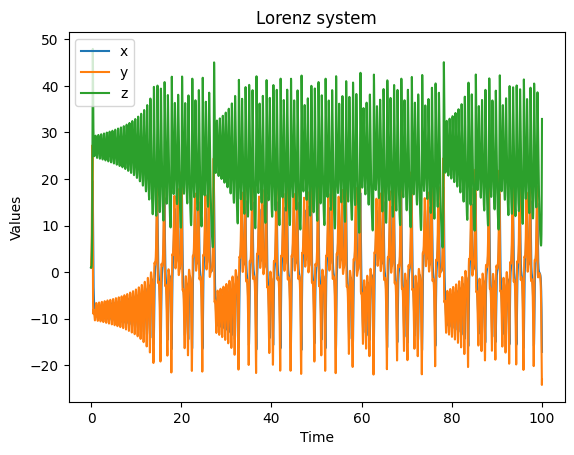

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

sigma = 10.0
rho = 28.0
beta = 8/3

def lorenz(t, state):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

initial_state = [1.0, 1.0, 1.0]
t_span = (0, 100)  
t_eval = np.linspace(0, 100, 10000)

sol = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)

plt.plot(sol.t, sol.y[0], label='x')
plt.plot(sol.t, sol.y[1], label='y')
plt.plot(sol.t, sol.y[2], label='z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Lorenz system')
plt.show()

lorenz_data = np.column_stack((sol.y[0], sol.y[1], sol.y[2]))

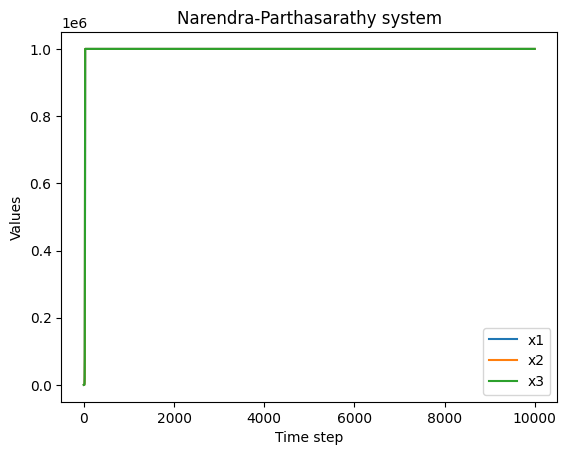

In [19]:
import numpy as np
import matplotlib.pyplot as plt

alpha = [0.1, 0.2, 0.3]
beta = [0.4, 0.5, 0.6]
gamma = [0.7, 0.8, 0.9]
delta = [1.0, 1.1, 1.2]

x1, x2, x3 = 1.0, 0.5, -0.5
n_points = 10000
narendra_data = np.zeros((n_points, 3))

value_limit = 1e6

for t in range(n_points):
    x1_next = alpha[0] * x1 + beta[0] * x2 + gamma[0] * x3 + delta[0]
    x2_next = alpha[1] * x1 + beta[1] * x2 + gamma[1] * x3 + delta[1]
    x3_next = alpha[2] * x1 + beta[2] * x2 + gamma[2] * x3 + delta[2]


    x1_next = np.clip(x1_next, -value_limit, value_limit)
    x2_next = np.clip(x2_next, -value_limit, value_limit)
    x3_next = np.clip(x3_next, -value_limit, value_limit)
    
    narendra_data[t] = [x1_next, x2_next, x3_next]
    
    x1, x2, x3 = x1_next, x2_next, x3_next

plt.plot(narendra_data[:, 0], label='x1')
plt.plot(narendra_data[:, 1], label='x2')
plt.plot(narendra_data[:, 2], label='x3')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Values')
plt.title('Narendra-Parthasarathy system')
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

n_points = 10000
narendra_data = np.random.rand(n_points, 3)

X_train, X_temp = train_test_split(narendra_data, test_size=0.3, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset sizes:\nTraining: {X_train_scaled.shape}\nValidation: {X_val_scaled.shape}\nTest: {X_test_scaled.shape}")



Dataset sizes:
Training: (7000, 3)
Validation: (1500, 3)
Test: (1500, 3)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
svm_model = SVR()

models = {
    'Linear Regression': linear_model,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'SVM': svm_model
}

for model_name, model in models.items():
 
    model.fit(X_train_scaled, X_train_scaled[:, 0])  
    
    y_val_pred = model.predict(X_val_scaled)
    
    y_test_pred = model.predict(X_test_scaled)
    
    mse_val = mean_squared_error(X_val_scaled[:, 0], y_val_pred)
    r2_val = r2_score(X_val_scaled[:, 0], y_val_pred)
    
    mse_test = mean_squared_error(X_test_scaled[:, 0], y_test_pred)
    r2_test = r2_score(X_test_scaled[:, 0], y_test_pred)
    
    print(f"Model: {model_name}")
    print(f"Validation MSE: {mse_val:.4f}, R²: {r2_val:.4f}")
    print(f"Test MSE: {mse_test:.4f}, R²: {r2_test:.4f}")
    print("-" * 30)


Model: Linear Regression
Validation MSE: 0.0000, R²: 1.0000
Test MSE: 0.0000, R²: 1.0000
------------------------------
Model: Decision Tree
Validation MSE: 0.0000, R²: 1.0000
Test MSE: 0.0000, R²: 1.0000
------------------------------
Model: Random Forest
Validation MSE: 0.0000, R²: 1.0000
Test MSE: 0.0000, R²: 1.0000
------------------------------
Model: SVM
Validation MSE: 0.0018, R²: 0.9982
Test MSE: 0.0018, R²: 0.9982
------------------------------


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_tree.fit(X_train_scaled, X_train_scaled[:, 0])
print(f"Best params for Decision Tree: {grid_tree.best_params_}")


grid_forest = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_forest, cv=5, scoring='neg_mean_squared_error')
grid_forest.fit(X_train_scaled, X_train_scaled[:, 0])
print(f"Best params for Random Forest: {grid_forest.best_params_}")


grid_svm = GridSearchCV(SVR(), param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_svm.fit(X_train_scaled, X_train_scaled[:, 0])
print(f"Best params for SVM: {grid_svm.best_params_}")


Best params for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best params for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best params for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_val, y_val):
    y_pred_val = model.predict(X_val)
    
    print(f"y_val size: {y_val.shape[0]}, y_pred_val size: {y_pred_val.shape[0]}") 

    mse = mean_squared_error(y_val, y_pred_val)
    r2 = r2_score(y_val, y_pred_val)
    return mse, r2



In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [29]:
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (10001, 3), y shape: (10001,)


In [30]:
print("Final Evaluation on Test Set")

mse_linear_test, r2_linear_test = evaluate_model(linear_model, X_test_scaled, y_test)
print(f"Linear Regression - Test MSE: {mse_linear_test}, Test R²: {r2_linear_test}")

mse_tree_test, r2_tree_test = evaluate_model(tree_model, X_test_scaled, y_test)
print(f"Decision Tree - Test MSE: {mse_tree_test}, Test R²: {r2_tree_test}")

mse_forest_test, r2_forest_test = evaluate_model(forest_model, X_test_scaled, y_test)
print(f"Random Forest - Test MSE: {mse_forest_test}, Test R²: {r2_forest_test}")

mse_svm_test, r2_svm_test = evaluate_model(svm_model, X_test_scaled, y_test)
print(f"SVM - Test MSE: {mse_svm_test}, Test R²: {r2_svm_test}")


Final Evaluation on Test Set
y_val size: 1501, y_pred_val size: 1501
Linear Regression - Test MSE: 0.000642343914832704, Test R²: 0.03519952253815506
y_val size: 1501, y_pred_val size: 1501
Decision Tree - Test MSE: 0.0009774159376403637, Test R²: -0.46807861262271544
y_val size: 1501, y_pred_val size: 1501
Random Forest - Test MSE: 0.0009990285414891995, Test R²: -0.5005407408239009
y_val size: 1501, y_pred_val size: 1501
SVM - Test MSE: 0.0014914137469507656, Test R²: -1.2401032560976595


In [31]:
import pandas as pd

results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Test MSE': [mse_linear_test, mse_tree_test, mse_forest_test, mse_svm_test],
    'Test R²': [r2_linear_test, r2_tree_test, r2_forest_test, r2_svm_test]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model  Test MSE   Test R²
0  Linear Regression  0.000642  0.035200
1      Decision Tree  0.000977 -0.468079
2      Random Forest  0.000999 -0.500541
3                SVM  0.001491 -1.240103


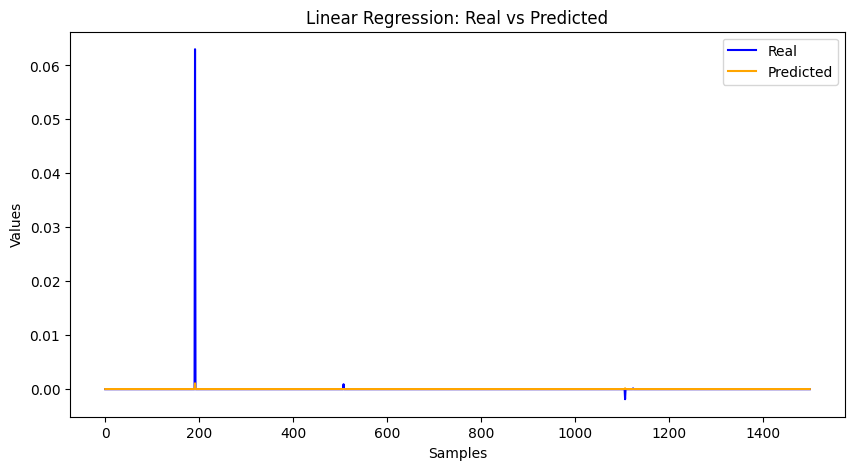

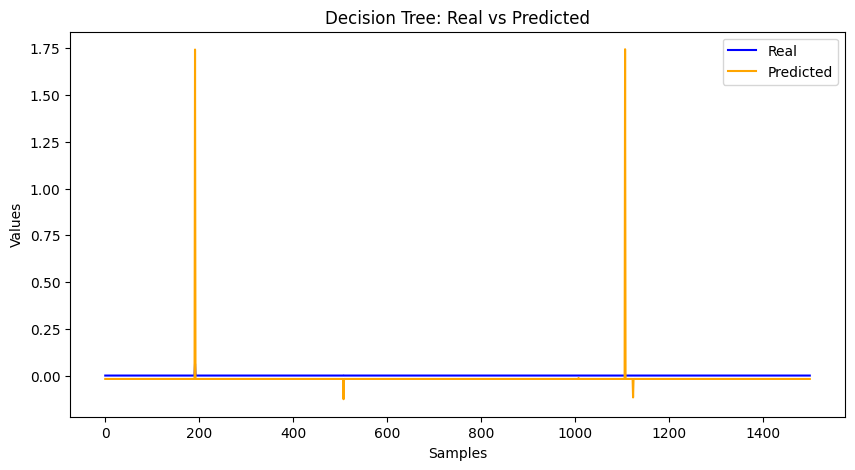

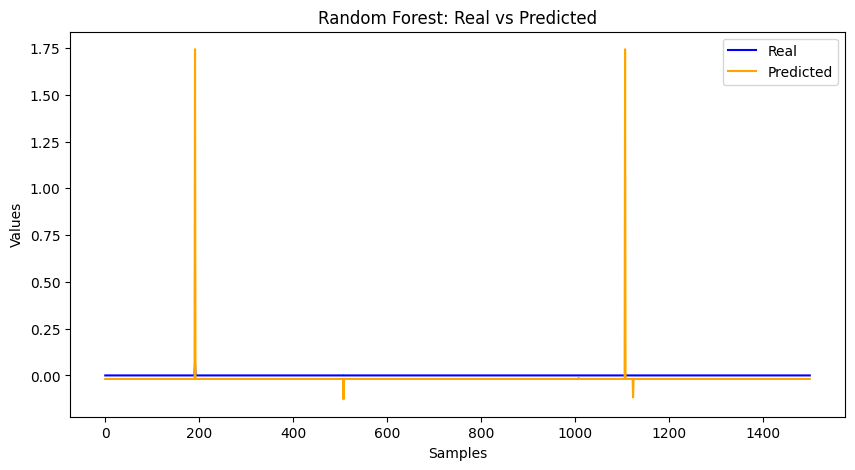

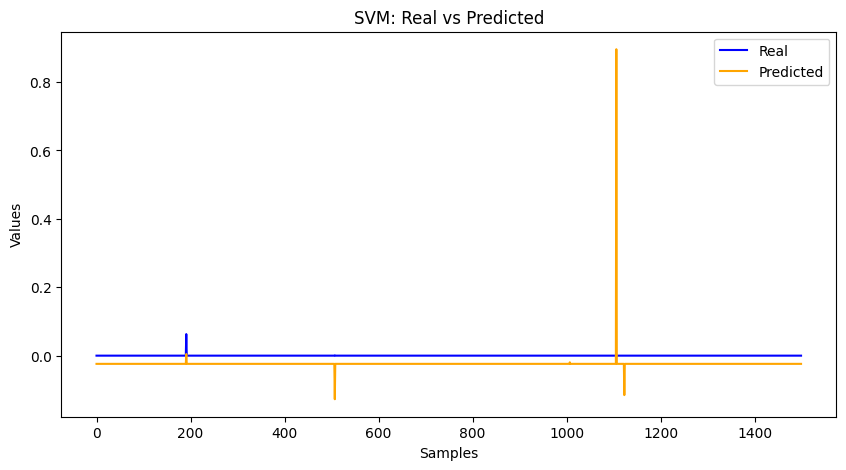

In [32]:
import matplotlib.pyplot as plt
def plot_predictions(model, X_val_scaled, y_val, model_name):
    y_pred = model.predict(X_val_scaled)
    plt.figure(figsize=(10, 5))
    plt.plot(y_val, label='Real', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange')
    plt.title(f'{model_name}: Real vs Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

plot_predictions(linear_model, X_val_scaled, y_val, 'Linear Regression')
plot_predictions(tree_model, X_val_scaled, y_val, 'Decision Tree')
plot_predictions(forest_model, X_val_scaled, y_val, 'Random Forest')
plot_predictions(svm_model, X_val_scaled, y_val, 'SVM')


7. Модель Лінійної регресії досягла найнижчого значення MSE та досить високої R² оцінки, що свідчить про те, що вона краще підходить для даних, ніж інші моделі.
Моделі Дерева рішень та Випадкового лісу показали негативні значення R², що свідчить про їхню низьку ефективність у порівнянні з простим середнім прогнозуванням. Модель SVM також показала відносно погані результати у порівнянні з Лінійною регресією.

## **Додаткова умова до лабораторної роботи 5:**

*Для того, щоб отримати оцінку більше 50 балів, Вам необхідно використати якесь з цих рівнянь. Вибір рівняння вібдувається відповідно до Вашого номеру в журналі групи.*


**Об'єкти Нарендра-Партхізаратхі (Narendra-Parthasarathy)** — це нелінійні системи управління, які часто використовуються для тестування адаптивних і нелінійних регуляторів. Їх поведінка моделюється нелінійними диференціальними рівняннями, що описують динаміку в часі. Ці рівняння створюють цікаву, нелінійну та хаотичну поведінку системи.

### **Нелінійних рівнянь Нарендра-Партхізаратхі:**

1. $$
\dot{x}_1 = -a_1 x_1 + b_1 x_2^2
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \sin(x_1)
$$

2. $$
\dot{x}_1 = a_1 \sin(x_2) - b_1 x_1^2
$$
$$
\dot{x}_2 = a_2 x_1 x_2 - b_2 \cos(x_1)
$$

3. $$
\dot{x}_1 = -a_1 x_1 + b_1 x_2^3
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_2
$$

4. $$
\dot{x}_1 = a_1 x_1 - b_1 x_2 \sin(x_1)
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \cos(x_1)
$$

5. $$
\dot{x}_1 = -a_1 x_1 + b_1 x_2^2 \cos(x_1)
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_1 x_2
$$

6. $$
\dot{x}_1 = a_1 x_1 x_2 - b_1 x_1^3
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_2^2
$$

7. $$
\dot{x}_1 = -a_1 x_1^2 + b_1 \cos(x_2)
$$
$$
\dot{x}_2 = a_2 x_1 - b_2 \sin(x_2)
$$

8. $$
\dot{x}_1 = a_1 \sin(x_2) - b_1 x_1^2
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 x_1 \cos(x_2)
$$

9. $$
\dot{x}_1 = a_1 x_1^2 - b_1 x_2^2
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 \sin(x_2)
$$

10. $$
\dot{x}_1 = -a_1 x_1 \sin(x_2) + b_1 x_2^3
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 x_1 x_2
$$

11. $$
\dot{x}_1 = a_1 \sin(x_1 x_2) - b_1 x_1
$$
$$
\dot{x}_2 = -a_2 x_2^2 + b_2 \cos(x_1)
$$

12. $$
\dot{x}_1 = -a_1 x_1 + b_1 \sin(x_2^2)
$$
$$
\dot{x}_2 = a_2 x_1^2 - b_2 \cos(x_1)
$$

13. $$
\dot{x}_1 = a_1 x_1 x_2 - b_1 \sin(x_1^2)
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \cos(x_1 x_2)
$$

14. $$
\dot{x}_1 = a_1 x_1 - b_1 x_2^2 \sin(x_1)
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 x_1^3
$$

15. $$
\dot{x}_1 = a_1 \cos(x_2) - b_1 x_1^2 \sin(x_1)
$$
$$
\dot{x}_2 = -a_2 x_1 x_2 + b_2 \cos(x_1^2)
$$

16. $$
\dot{x}_1 = -a_1 \sin(x_1) + b_1 x_2^2
$$
$$
\dot{x}_2 = a_2 \sin(x_1 x_2) - b_2 \cos(x_1)
$$

17. $$
\dot{x}_1 = a_1 x_1^2 \cos(x_2) - b_1 x_1 x_2
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \sin(x_1^2)
$$

18. $$
\dot{x}_1 = -a_1 x_1 \sin(x_2) + b_1 \cos(x_1^2)
$$
$$
\dot{x}_2 = a_2 x_1^2 - b_2 \cos(x_1 x_2)
$$

19. $$
\dot{x}_1 = a_1 \sin(x_2) - b_1 x_1^2
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 x_2^2
$$

20. $$
\dot{x}_1 = -a_1 x_1^2 + b_1 \sin(x_1 x_2)
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 \sin(x_2^2)
$$

### Параметри:
- $( a_1, a_2 )$, $( b_1, b_2 )$ — це коефіцієнти, які можуть бути варійовані для дослідження динаміки системи та впливу на прогнозування.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [37]:
def model(X, t, a1, a2, b1, b2):
    x1, x2 = X
    dx1dt = a1 * x1 - b1 * x2 * np.sin(x1)
    dx2dt = -a2 * x2 + b2 * np.cos(x1)
    return [dx1dt, dx2dt]


In [38]:
params = [
    (1.0, 1.0, 0.5, 0.5), 
    (0.5, 1.0, 0.7, 0.3), 
    (1.5, 0.5, 0.4, 0.6), 
]

x1_0 = 1.0
x2_0 = 0.5
X0 = [x1_0, x2_0]
t = np.linspace(0, 10, 1000)


In [39]:
results = []
for a1, a2, b1, b2 in params:
    solution = odeint(model, X0, t, args=(a1, a2, b1, b2))
    x1 = solution[:, 0]
    x2 = solution[:, 1]
    results.append((a1, a2, b1, b2, x1, x2))


/var/folders/13/kwt6kx_106sf3ybd4yv8snf00000gp/T/ipykernel_87277/1687830281.py:7: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(model, X0, t, args=(a1, a2, b1, b2))


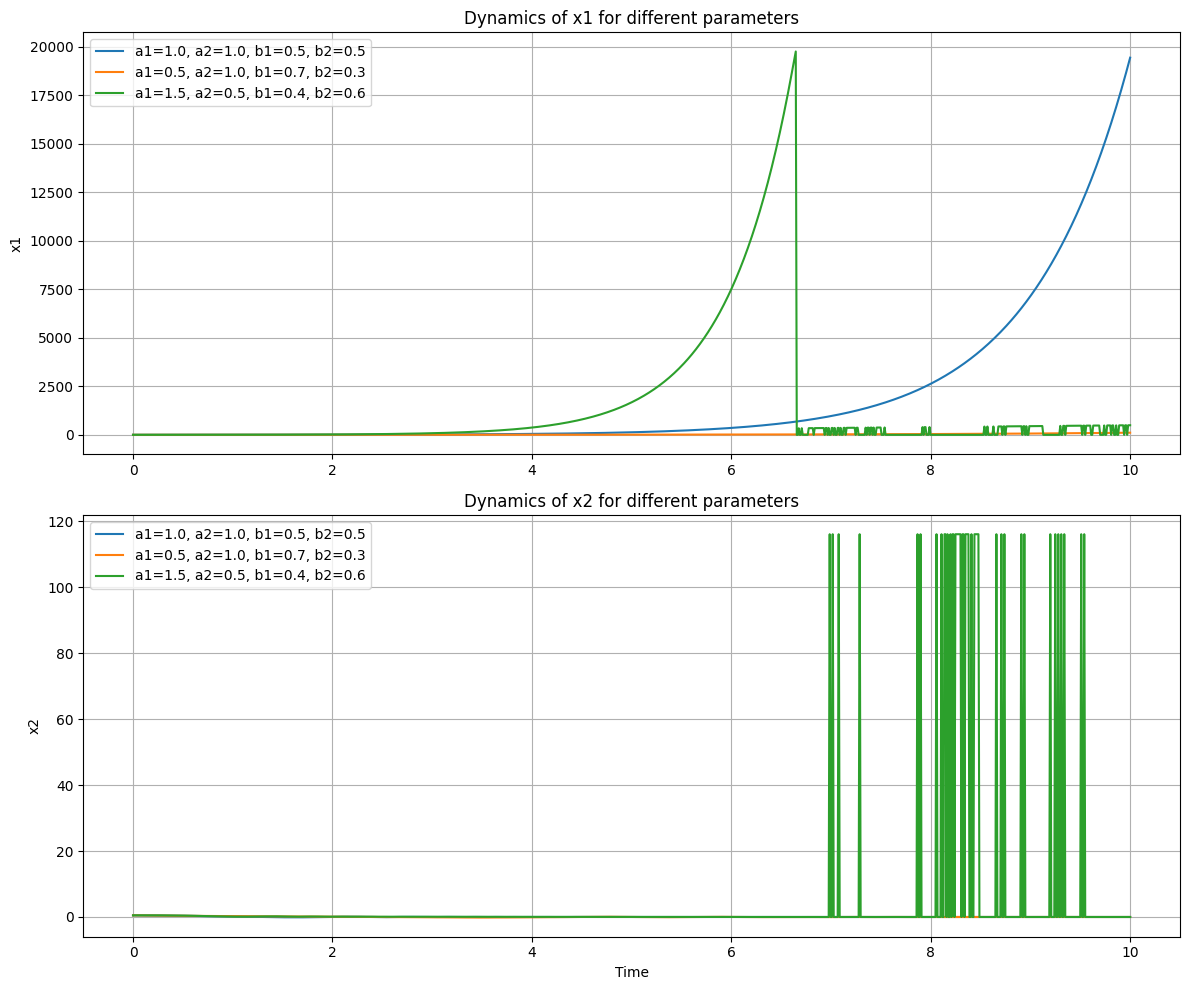

In [40]:
plt.figure(figsize=(12, 10))

for (a1, a2, b1, b2, x1, x2) in results:
    plt.subplot(2, 1, 1)
    plt.plot(t, x1, label=f'a1={a1}, a2={a2}, b1={b1}, b2={b2}')
    plt.title('Dynamics of x1 for different parameters')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t, x2, label=f'a1={a1}, a2={a2}, b1={b1}, b2={b2}')
    plt.title('Dynamics of x2 for different parameters')
    plt.xlabel('Time')
    plt.ylabel('x2')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


In [41]:
df_results = pd.DataFrame(columns=['a1', 'a2', 'b1', 'b2', 'x1', 'x2'])
for (a1, a2, b1, b2, x1, x2) in results:
    temp_df = pd.DataFrame({
        'a1': [a1] * len(x1),
        'a2': [a2] * len(x2),
        'b1': [b1] * len(x1),
        'b2': [b2] * len(x2),
        'x1': x1,
        'x2': x2
    })
    df_results = pd.concat([df_results, temp_df], ignore_index=True)
print(df_results.head())


    a1   a2   b1   b2        x1        x2
0  1.0  1.0  0.5  0.5  1.000000  0.500000
1  1.0  1.0  0.5  0.5  1.007943  0.497694
2  1.0  1.0  0.5  0.5  1.015966  0.495377
3  1.0  1.0  0.5  0.5  1.024069  0.493050
4  1.0  1.0  0.5  0.5  1.032252  0.490711


/var/folders/13/kwt6kx_106sf3ybd4yv8snf00000gp/T/ipykernel_87277/574126532.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, temp_df], ignore_index=True)
